In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import ipywidgets as widgets

filename = 'imdb.csv'

test = pd.read_csv(filename, sep=';', encoding='latin-1', escapechar='\\')

df = pd.DataFrame(test)
print(df.shape)

for i in range(44,48):
    df.drop(columns=[f'Unnamed: {i}'], inplace=True)

df.drop(columns=['fn','tid','wordsInTitle','url'], inplace=True)
I = df['imdbRating']
print(df.shape)


I = df['type'] == 'video.movie'
df = df.loc[I]
df.drop(columns=['type'], inplace=True)
print(df.shape)

df.dropna(inplace=True)
print(df.shape)

df['imdbRating'] = df['imdbRating'].astype(str)
df['imdbRating'].replace(regex=True, inplace=True,to_replace='0',value='')
print(type(df['imdbRating'][0]))
df['imdbRating'] = df['imdbRating'].astype(float)

df['duration'] = df['duration']/60**2

test = np.array([1, 2, 3])

#df.to_excel('imdb_test.xlsx', index=False)
print(df.head(8))

(14761, 48)
(14761, 40)
(11072, 39)
(10463, 39)
<class 'str'>
                              title  imdbRating  ratingCount  duration  \
0  Der Vagabund und das Kind (1921)         8.4      40550.0  0.900000   
1                 Goldrausch (1925)         8.3      45319.0  1.583333   
2                 Metropolis (1927)         8.4      81007.0  2.550000   
3                Der General (1926)         8.3      37521.0  1.783333   
4     Lichter der GroÌÙstadt (1931)         8.7      70057.0  1.450000   
5                          M (1931)         8.5      73726.0  1.950000   
6  Es geschah in einer Nacht (1934)         8.3      46503.0  1.750000   
7             Moderne Zeiten (1936)         8.6      90847.0  1.450000   

     year  nrOfWins  nrOfNominations  nrOfPhotos  nrOfNewsArticles  \
0  1921.0       1.0              0.0        19.0              96.0   
1  1925.0       2.0              1.0        35.0             110.0   
2  1927.0       3.0              4.0        67.0             

In [2]:
# Summary Stats
print(df.dtypes)
df["imdbRating"].plot(kind="hist", bins=10)

title                object
imdbRating          float64
ratingCount         float64
duration            float64
year                float64
nrOfWins            float64
nrOfNominations     float64
nrOfPhotos          float64
nrOfNewsArticles    float64
nrOfUserReviews     float64
nrOfGenre           float64
Action              float64
Adult               float64
Adventure           float64
Animation           float64
Biography           float64
Comedy              float64
Crime               float64
Documentary         float64
Drama               float64
Family              float64
Fantasy             float64
FilmNoir            float64
GameShow            float64
History             float64
Horror              float64
Music               float64
Musical             float64
Mystery             float64
News                float64
RealityTV           float64
Romance             float64
SciFi               float64
Short               float64
Sport               float64
TalkShow            

In [64]:
# Generating genre list
genre = ['Action', 'Adult', 'Adventure', 'Animation', 'Biography',
         'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
         'FilmNoir', 'GameShow', 'History', 'Horror', 'Music', 'Musical',
         'Mystery', 'News', 'RealityTV', 'Romance', 'SciFi', 'Short', 'Sport',
         'TalkShow', 'Thriller', 'War', 'Western']


# Counting movies in each genre
for i in genre: 
    sum = df[i].sum(axis=0)
    print(f'Sum of {i}: {sum:.0f}')


Sum of Action: 1794
Sum of Adult: 16
Sum of Adventure: 1469
Sum of Animation: 540
Sum of Biography: 543
Sum of Comedy: 3357
Sum of Crime: 1649
Sum of Documentary: 780
Sum of Drama: 5151
Sum of Family: 686
Sum of Fantasy: 689
Sum of FilmNoir: 190
Sum of GameShow: 2
Sum of History: 464
Sum of Horror: 935
Sum of Music: 269
Sum of Musical: 332
Sum of Mystery: 754
Sum of News: 2
Sum of RealityTV: 2
Sum of Romance: 1719
Sum of SciFi: 734
Sum of Short: 406
Sum of Sport: 205
Sum of TalkShow: 3
Sum of Thriller: 1240
Sum of War: 445
Sum of Western: 297


In [ ]:
# Summary Statistics 
# print(df[['year','imdbRating']].groupby('year').mean())

df[["year", "imdbRating", "duration", "nrOfWins", "nrOfNominations"]].describe() 

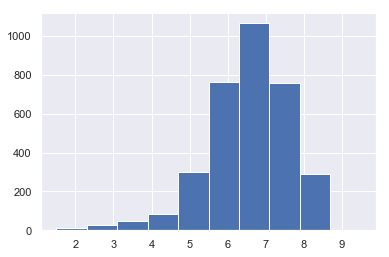

interactive(children=(Dropdown(description='Genre', index=5, options=('Action', 'Adult', 'Adventure', 'Animati…

In [159]:
# Histogram
import seaborn as sns
sns.set()

# plt.hist(df["imdbRating"], bins=10)


# Histogram by genre
df_hist = df.loc[df["Comedy"] == 1]
plt.hist(df_hist["imdbRating"], bins=10)


# Interactive Histogram
def histogram(variable, genre, bins_num):
        df_hist = df.loc[df[genre] == 1]
        plt.hist(df_hist[variable], bins=bins_num)
    
        # Labels
        plt.title("Histogram")
        plt.ylabel("Number")
        plt.xticks(range(1,11))
    
# histogram("imdbRating", "Comedy")   # Remember quote marks around variable names. 


def hist_interactive(variable): 
    widgets.interact(histogram, 
    variable = widgets.fixed(variable), 
    
    # Genre Dropdown
    genre = widgets.Dropdown(
    description="Genre", 
    options=genre, 
    value="Comedy"),
    
    # Bins slider 
    bins_num=widgets.IntSlider(
    value=10,
    description="Bins", 
    min=1,
    max=50, 
    step=1,
    disabled=False,
    continuous_update=False)
    ); 

hist_interactive("imdbRating")



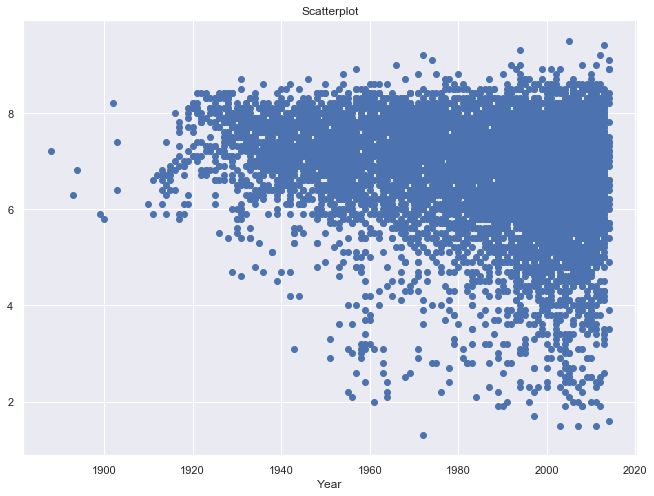

In [167]:
# Scatterplot
def scatter(variable):
    plt.figure(figsize=(11,8))
    plt.scatter(df['year'], variable)
    
    plt.title("Scatterplot")
    plt.xlabel("Year")

scatter(df["imdbRating"])    


# df[df["nrOfWins"] == 137]
# df[df["nrOfNominations"] == 137]


In [137]:
# df[df["nrOfWins"] < df["nrOfNominations"]]

Text(0, 0.5, 'Nr. of Wins')

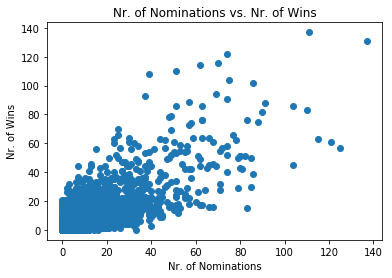

In [90]:
plt.scatter(df['nrOfNominations'], df["nrOfWins"])
plt.title("Nr. of Nominations vs. Nr. of Wins")
plt.xlabel("Nr. of Nominations")
plt.ylabel("Nr. of Wins")

In [ ]:
# Swarm plot 
def swarm_plot(y="imdbRating"): 
    if df[df["year"]] >= 2015:
        sns.swarmplot(x = "year", y = y, data=df)
        plt.xlabel(genre)
        plt.ylabel("Ratings")

swarm_plot()